<a href="https://colab.research.google.com/github/AMElashal26/Health-Breaches/blob/master/Capstone_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Tools

In [2]:
#load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set()
#import warnings 
from google.colab import files
#warnings.filterwarnings('ignore')
from datetime import timedelta
from scipy.stats import boxcox

We propose to conduct research by evaluating a dataset that contains information on data breaches of unencrypted protected health information. This identifies individual information of patients and healthcare entities, and it is reported by these entities health plans & clinicians. These breach reports are reported to the US Department of Health and Human Services, who maintain the database. Privacy of health information is a major point of interest for all those involved in healthcare, be it practitioners or patients. The Health Information Portability and Accountability Act (HIPAA) is a critical law that is integrated into the framework of healthcare practice. Patient information cannot be unlawfully disclosed, and many healthcare education programs have dedicated healthcare law that goes into the specifics of this law. 

Our dataset can be seen here: https://ocrportal.hhs.gov/ocr/breach/breach_report.jsf

The point stands that healthcare providers are held to an extreme level of responsibility and accountability when it comes to maintaining the privacy of their patients. The healthcare system is held to a high degree of scrutiny when it comes to maintaining any one individual’s privacy. These breach reports are mandated by the Health Information Technology for Economic and Clinical Health Act of 2009. This includes acquisition, access, use, or disclosure of health information.

Our question is, how has the scope of data breaches into the healthcare system been affected by coronavirus? What factors influence the breaching of a healthcare entity? Does geography influence subsequent attacks? Are those with less individuals affected by the breach--presumably smaller practices--more likely or less likely to have their information infiltrated, and in what way? What is the most common location of breached information?

We believe that coronavirus, and the subsequent effects it has had on congesting health systems and introducing technology for the uses of a quarantine, has increased the scope of healthcare data breaches. We believe that entities in proximity may be breached in the same window of time. We believe locations with a smaller number of individuals affected are more likely to be breached, and that the most common location where information is breached is email--exploiting human error. We further believe that systems were more vulnerable to email vectors of attack after the pandemic. With more employees working from home, coordination may have provided a window for ease of access through increased emailing.

We will test the pandemic hypothesis by separating the breaches by date. Those before and after March 11, 2020, COVID’s pandemic declaration date, will be aggregated by frequency and number of individuals affected. We will also inspect a subpopulation of the post-quarantine group by a month-by-month analysis of the frequency of breaches and the number of individuals affected. 

We will assess the frequency of each state’s reported breaches, and do a data analysis to find the total number of individuals affected per state, as well as their average amount. We will further assess data breaches by state happening in the same week period, to get an idea if proximal systems were under the scope of infiltrators whether for motive or connected security measures. We will find the frequency of email vectors before and after 3/11/20.  We will plot a histogram for each breach’s number of individuals affected to get an idea of the distribution, so that we may know what is considered a relatively ‘large’ and ‘small’ amount of individuals affected, and then we will find the frequency of breaches that to three standard deviations from the mean of number of individuals breached.

This research can create considerable value for many parties. HIPAA violations are expensive, in time and resources. Finding out the nature of healthcare entities’ level of compliance pre-pandemic will provide insight as to how vulnerable security measures are during a ‘stress test’ during this pandemic. Learning of each state’s scope of attack will expose those are particularly vulnerable to attack. This may indicate for critical measures be taken to subsidize security measures, so that healthcare entities can comply with the federal HIPAA legislature to a reasonable degree. More so, this leaves room for us to evaluate the state of healthcare and technology across the states. Finding those more prone to vulnerability will allow for investigative measures by security professionals as well as healthcare policy makers to fortify weaknesses, and establish standards in protocol that may help across the board. Figuring out if email is a particular weak point can allow for preventative measures. Understanding the scope of individuals affected, depending on distribution, may indicate that smaller or larger practices should receive stipends or grants in controlling their security operations.

Lastly, these entities contain information on patients that would allow infiltrators access to information that can be expensive to the government and the taxpayer. Access to healthcare information, addresses, birthdays, and healthcare conditions gives an avenue for false filing for government benefits during Coronavirus. 

In our treatment of this data, we found that there was a large amount of data before Corona compared to after it, not allowing a full scope to be assessed at this time or without a more intensive integration. 


#Assembling Data


#Upload


In [3]:
#Upload Datasets
df2 = pd.read_csv('https://raw.githubusercontent.com/AMElashal26/Health-Breaches/master/breach_report.csv', parse_dates=True) #Archive set, past years
df1 = pd.read_csv('https://raw.githubusercontent.com/AMElashal26/Health-Breaches/master/breach_report_recent.csv',parse_dates=True) #most recent


#Data Exploration and Cleaning

In [4]:
df2.info()

#replacing null values found (6 of them)
for i in range(0, len(df2.State)):
  if pd.isnull(df2.State[i]):
    df2.State[i] = 'NA'
for i in range(0, len(df1.State)):
  if pd.isnull(df1.State[i]):
    df1.State[i] = 'NA'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2785 entries, 0 to 2784
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name of Covered Entity            2785 non-null   object 
 1   State                             2779 non-null   object 
 2   Covered Entity Type               2782 non-null   object 
 3   Individuals Affected              2784 non-null   float64
 4   Breach Submission Date            2785 non-null   object 
 5   Type of Breach                    2784 non-null   object 
 6   Location of Breached Information  2785 non-null   object 
 7   Business Associate Present        2785 non-null   object 
 8   Web Description                   2574 non-null   object 
dtypes: float64(1), object(8)
memory usage: 195.9+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [5]:
#bulky column names, Government has to be official. 
#Let's be more concise for the cleanest tables.

#Let's clean some data

#unnecessary for this but worth looking at with nlp potentially, detailed description of breach
#Later, consider doing some nlp to extract information from this.

df2.rename(columns={'Type of Breach': 'Breach Type',
                    'Location of Breached Information':'Breach Location',
                    'Name of Covered Entity':'Entity Name',
                    'Covered Entity Type': 'Entity Type'}, inplace=True)

df1.rename(columns={'Type of Breach': 'Breach Type',
                    'Location of Breached Information':'Breach Location',
                    'Name of Covered Entity':'Entity Name',
                    'Covered Entity Type': 'Entity Type'}, inplace=True)


In [6]:
########Combine the two datasets
###### Delete duplicates after
#joining datasets
result = df1.append(df2)
result.info()

#remove duplicates
results_crop = pd.DataFrame.drop_duplicates(result)
results_crop.info()
colname=results_crop.columns
print(colname)
#looks like there were 4 duplicates removed.
results_crop.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3365 entries, 0 to 2784
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Entity Name                 3365 non-null   object 
 1   State                       3365 non-null   object 
 2   Entity Type                 3362 non-null   object 
 3   Individuals Affected        3364 non-null   float64
 4   Breach Submission Date      3365 non-null   object 
 5   Breach Type                 3364 non-null   object 
 6   Breach Location             3365 non-null   object 
 7   Business Associate Present  3365 non-null   object 
 8   Web Description             2574 non-null   object 
dtypes: float64(1), object(8)
memory usage: 262.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364 entries, 0 to 2784
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -

,Entity Name,State,Entity Type,Individuals Affected,Breach Submission Date,Breach Type,Breach Location,Business Associate Present,Web Description
0,"The Iowa Clinic, P.C.",IA,Healthcare Provider,914.0,08/11/2020,Unauthorized Access/Disclosure,Paper/Films,No,NaN
1,"BeneSys, Inc.",MI,Business Associate,1070.0,08/10/2020,Unauthorized Access/Disclosure,Email,Yes,NaN
2,"The Connection, Inc.",CT,Healthcare Provider,3736.0,08/07/2020,Hacking/IT Incident,Email,No,NaN
3,Summit Medical Associates,IN,Healthcare Provider,7264.0,08/04/2020,Hacking/IT Incident,Network Server,No,NaN
4,Northern Light Health,ME,Business Associate,657392.0,08/03/2020,Hacking/IT Incident,"Network Server, Other",Yes,NaN


#Now, let's look into some visualizations and analysis of the data

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


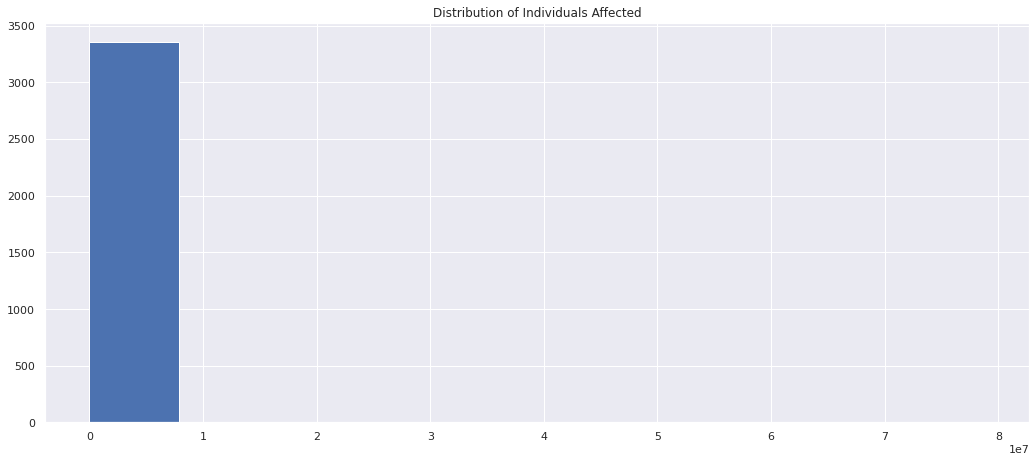

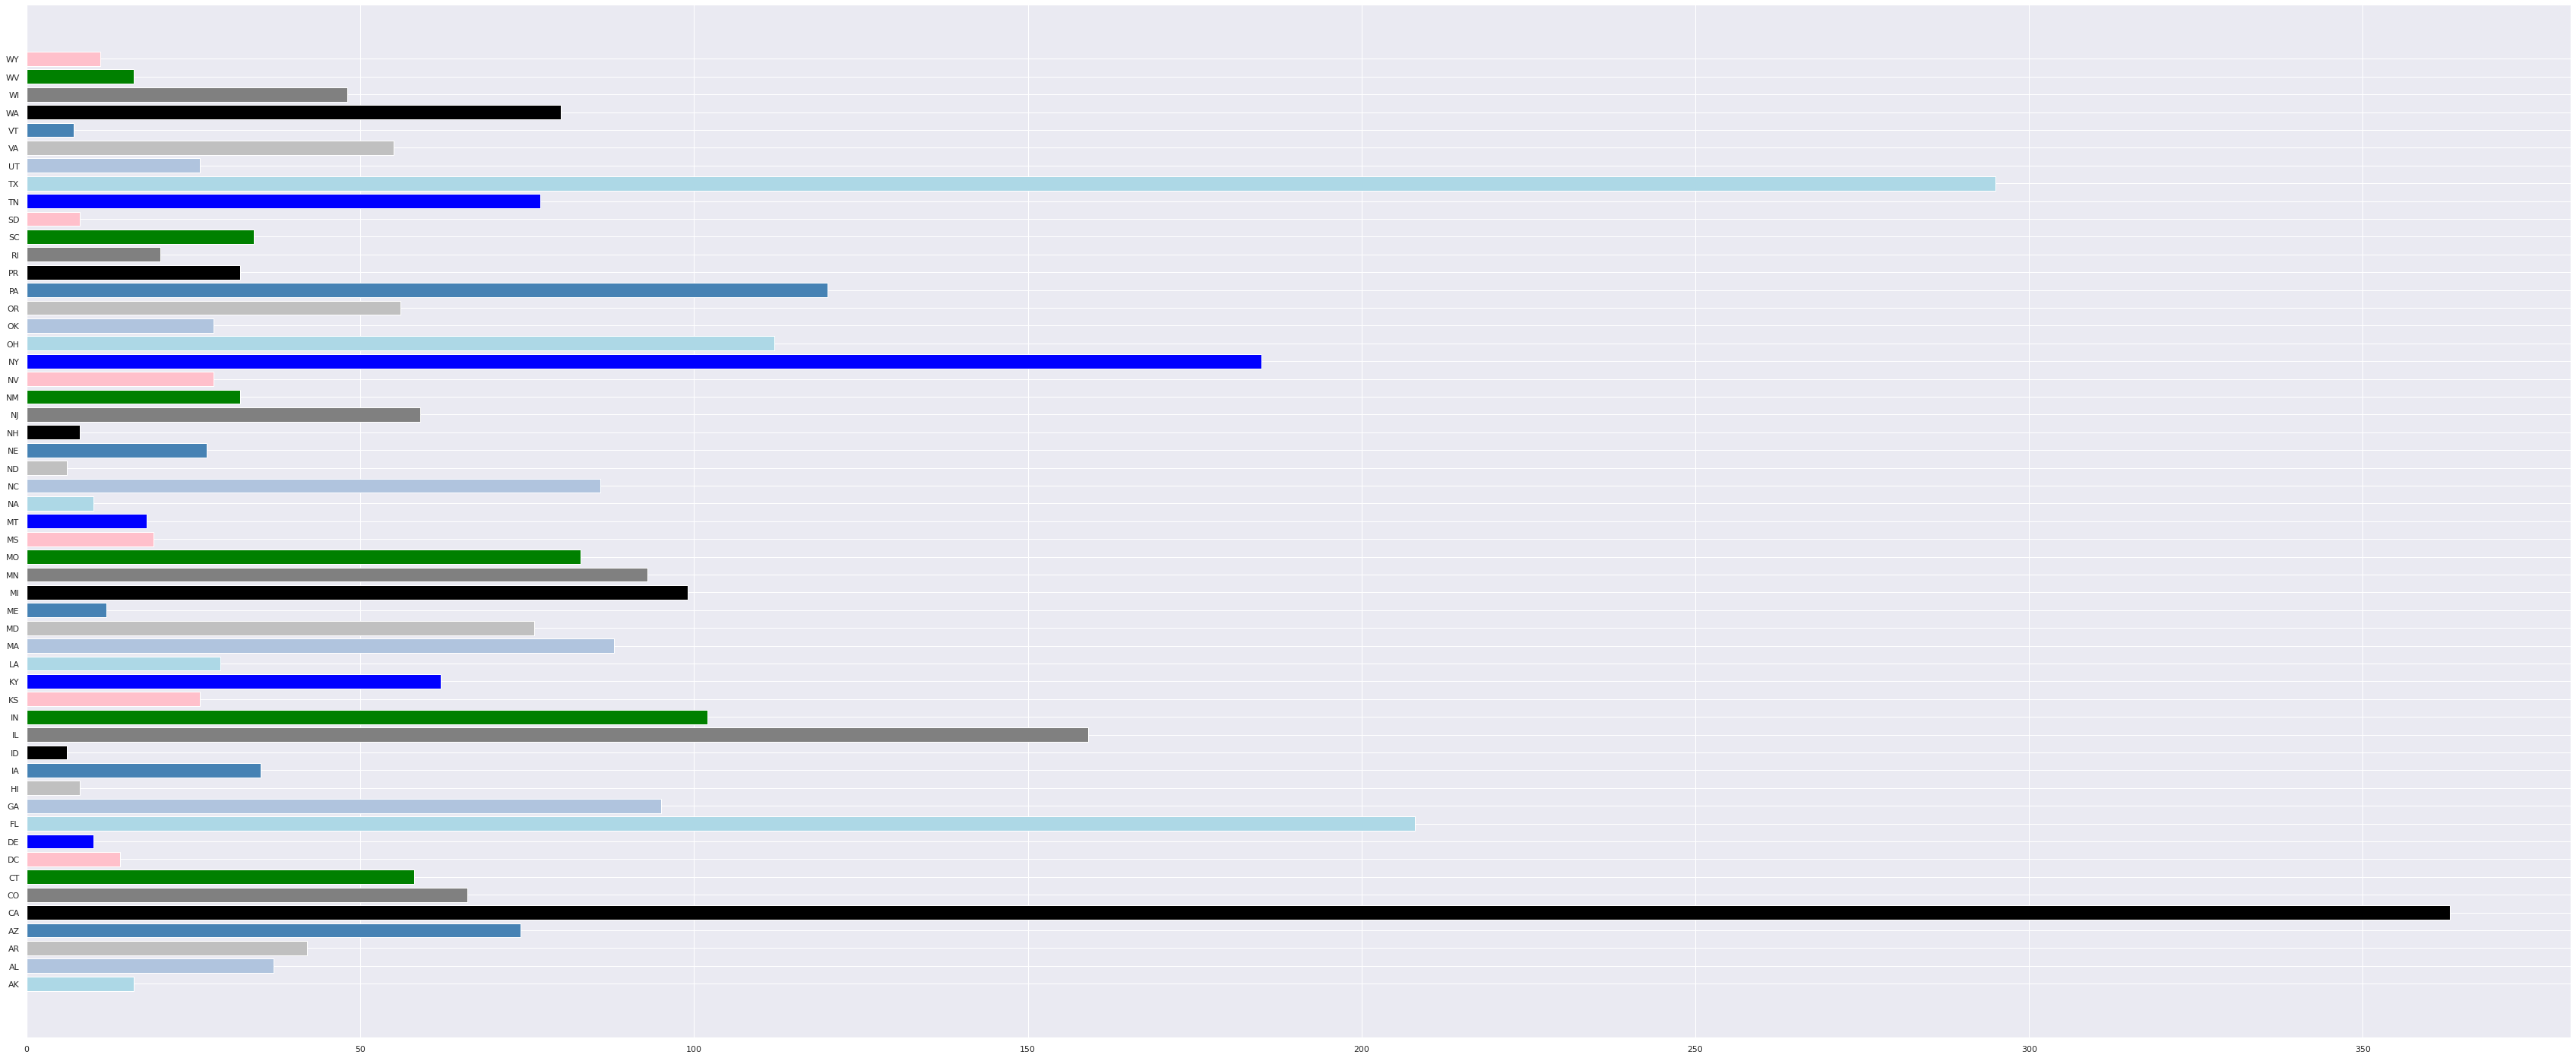

In [7]:
#The distribution of Individuals affected
plt.figure(figsize=(60,25))
ax = plt.subplot(3,3,1)
plt.hist(results_crop['Individuals Affected'])
plt.title("Distribution of Individuals Affected")

#Not a normal distribution

my_colors = ['lightblue','lightsteelblue','silver','steelblue','black','grey','green','pink','blue']
colores = ['red','green','blue','pink','grey','black']

plt.figure(figsize=(60,25))
plt.barh(results_crop.groupby("State")["State"].count().index, 
        results_crop.groupby("State")["State"].count(),
         color=my_colors)


plt.show()


We see that California, Texas, Georgia, New York, Illinois, and Pennsylvania have the most data breaches. This makes great sense, as each is likely correlated to the ammount of commercial activity in each state. Each of these states house 1 or more major industrial hubs, Such as San Francisco, LA, Austin, Dallas, Houston, Atlanta, New York City, Chicago, Pittsburgh, and Philadelphia.

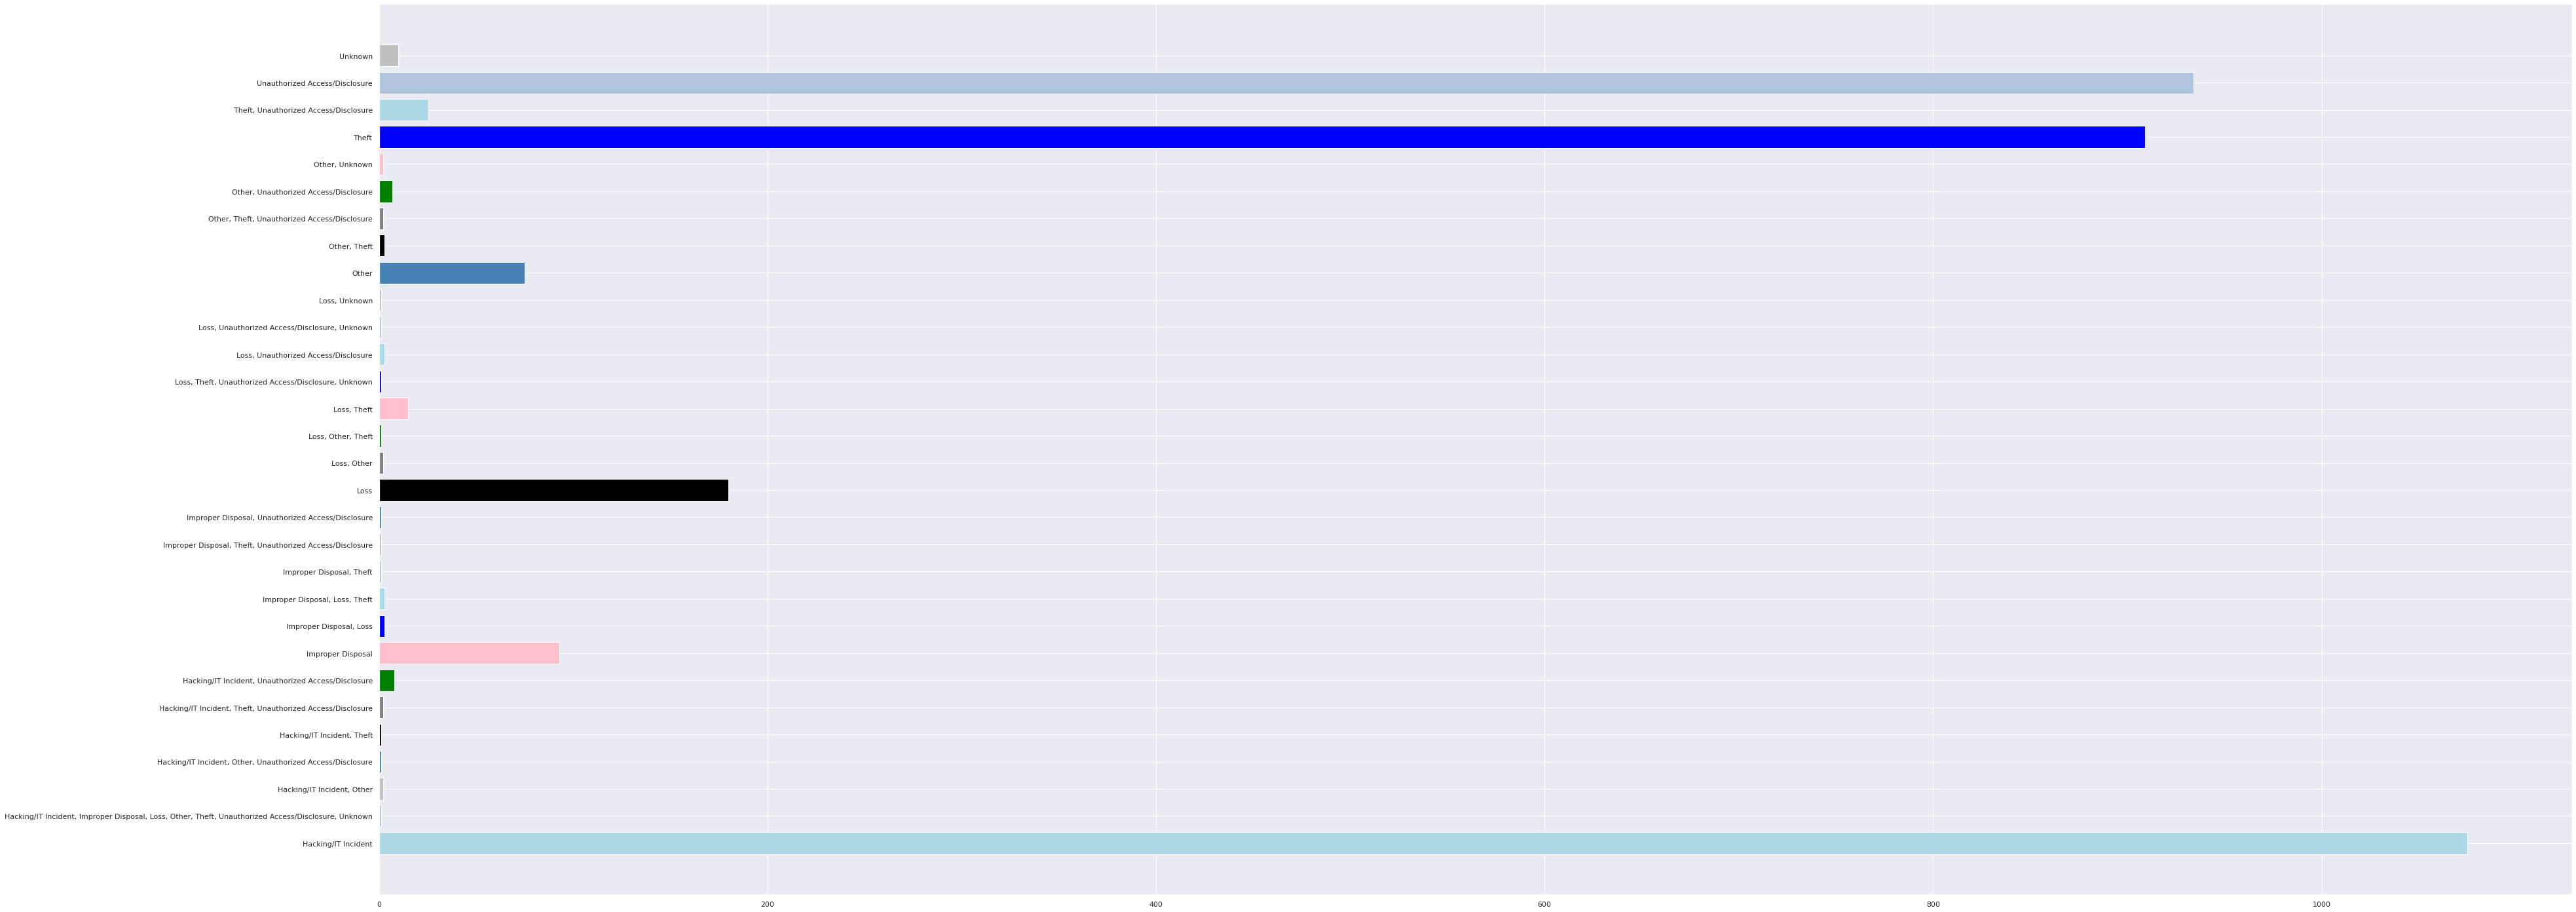

,Entity Name,State,Entity Type,Individuals Affected,Breach Submission Date,Breach Type,Breach Location,Business Associate Present,Web Description
2780,"Mark D. Lurie, MD",CA,Healthcare Provider,5166.0,11/20/2009,Theft,Desktop Computer,No,A shared Computer that was used for backup was...
2781,Health Services for Children with Special Need...,DC,Health Plan,3800.0,11/17/2009,Loss,Laptop,No,A laptop was lost by an employee while in tran...
2782,Alaska Department of Health and Social Services,AK,Healthcare Provider,501.0,10/30/2009,Theft,"Other, Other Portable Electronic Device",No,The Alaska Department of Health and Social Ser...
2783,"Mid America Kidney Stone Association, LLC",MO,Healthcare Provider,1000.0,10/28/2009,Theft,Network Server,No,Five desktop computers containing unencrypted ...
2784,Brooke Army Medical Center,TX,Healthcare Provider,1000.0,10/21/2009,Theft,Paper/Films,No,A binder containing the protected health infor...


In [8]:

plt.figure(figsize=(60,25))
plt.barh(results_crop.groupby("Breach Type")["Breach Type"].count().index, 
        results_crop.groupby("Breach Type")["Breach Type"].count(),
         color=my_colors)



#plt.barh(results_crop.groupby("State")["State"].count().index, 
  #   results_crop.groupby('Individuals Affected')["Individuals Affected"],
  #   color=my_colors)
#results_crop.plot.pie()


#plt.pie(results_crop.groupby("State")["State"].count(),results_crop.groupby("State")["State"].count().index,colors=my_colors)


df = results_crop[['State','Individuals Affected']].copy()


plt.show()
results_crop.tail()

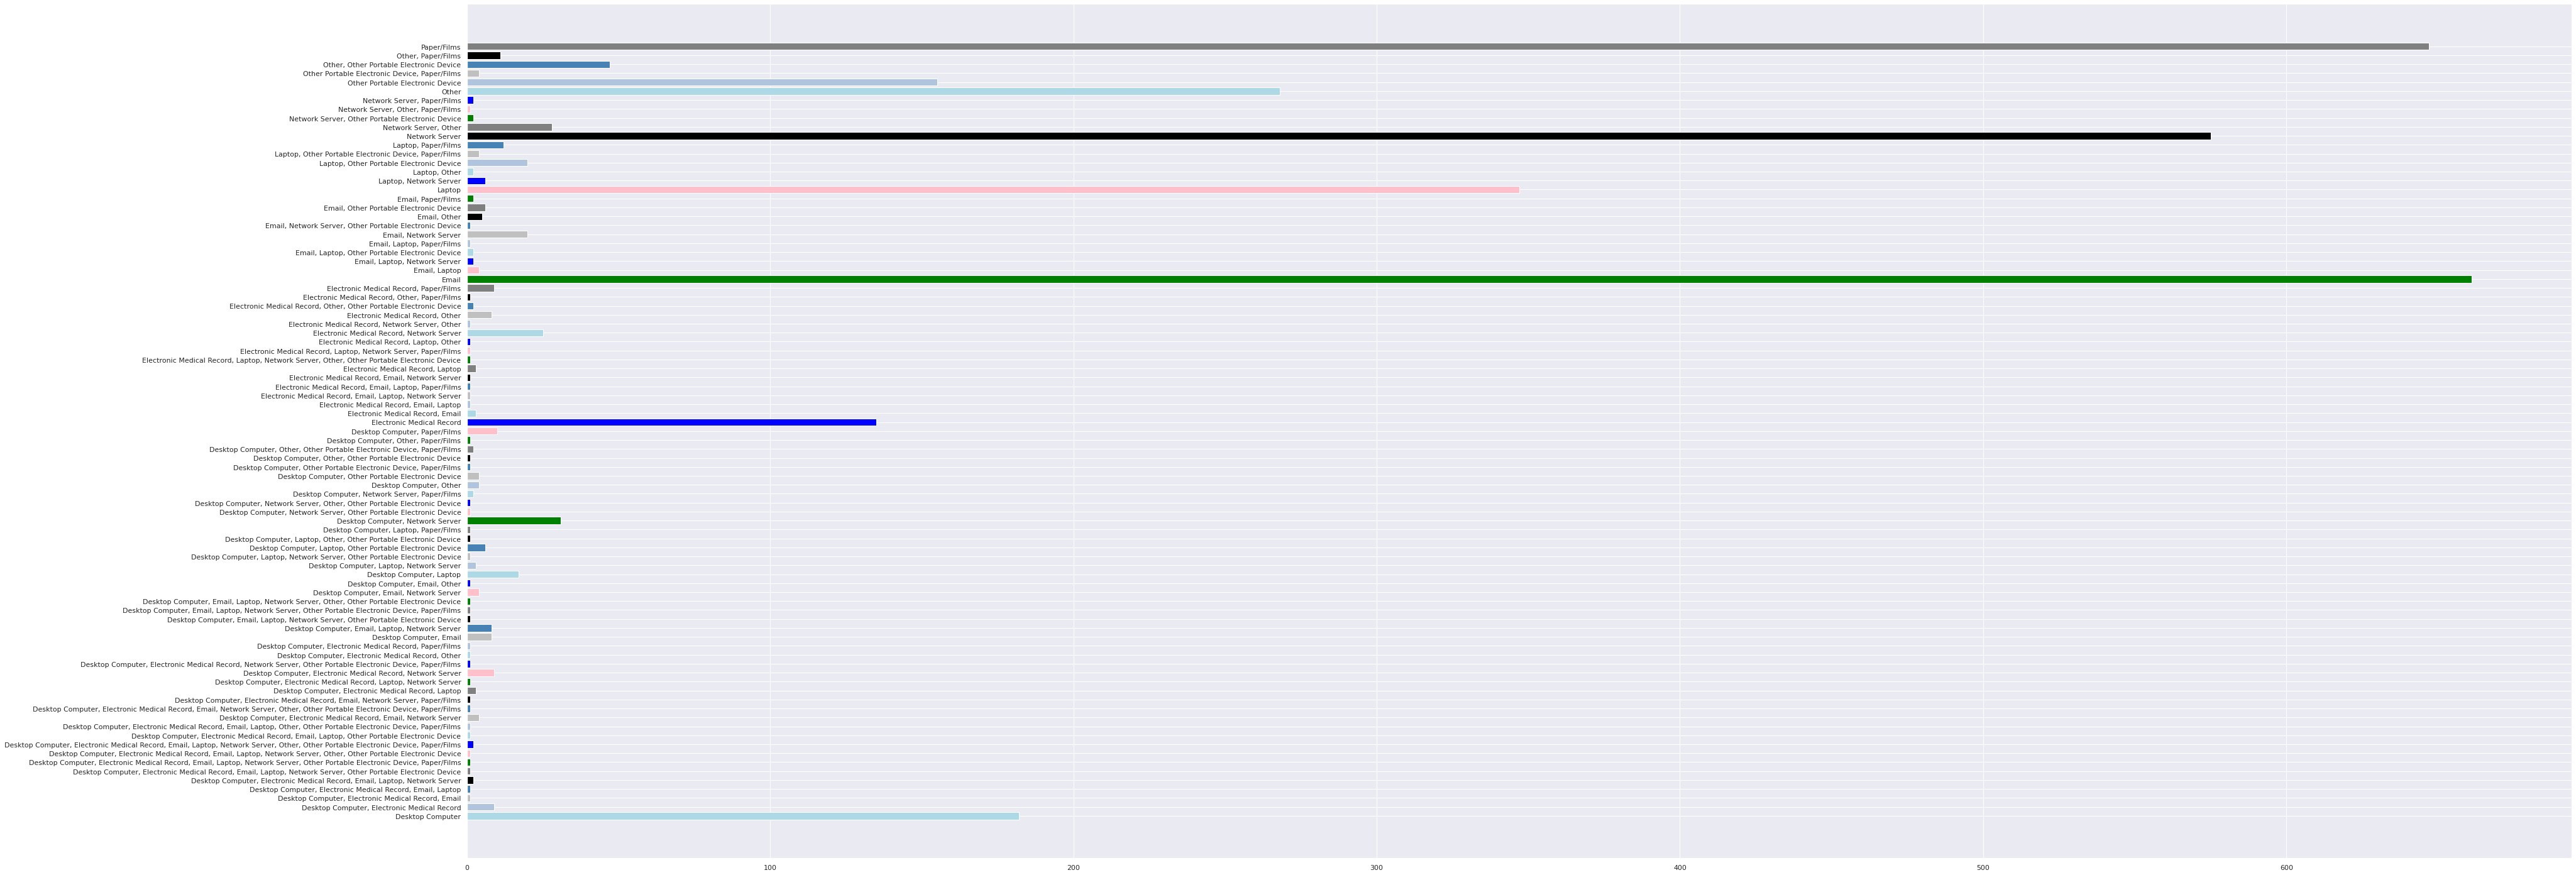

In [ ]:

plt.figure(figsize=(60,25))
plt.barh(results_crop.groupby("Breach Location")["Breach Location"].count().index, 
        results_crop.groupby("Breach Location")["Breach Location"].count(),
        color=my_colors)
plt.show()

In [ ]:

plt.figure(figsize=(60,25))
plt.pcolor(df)
plt.yticks(np.arange(1, len(df.index), 1), df.index)
plt.xticks(np.arange(1, len(df.columns), 1), df.columns)
plt.show()

This data can use some cleaning, as topics can cross over. However, Hacking/IT Incidents, Loss, Unauthorized disclosures/access, Email, Network Servers, and Paper/Films appear to be the most common vectors of attack, where as the location of the attack is heavily revealing the vulnerability of email.

Worth noting, is that this dataset is supplied as a result of compliance with Federal Healthcare Policy. Privacy of Patient Information is a big deal, governed by the Health Insurance Portability and Accountability Act (HIPAA). Mishandling this information costs great amounts to all parties involved, and can benefit entities, at the very least, to consider minimizing legal fees. 

In the time of corona and stimulus checks, we find great amounts of fraud going on. This information can also be used for other nefarious purposes, with the largest healthcare data breach actually happening recently. 

This dataset can be cleaned in further treatments of this data, merging breach locations and breach types that have unnecessarily been parsed, likely due to reporting errors. 

<BarContainer object of 4 artists>

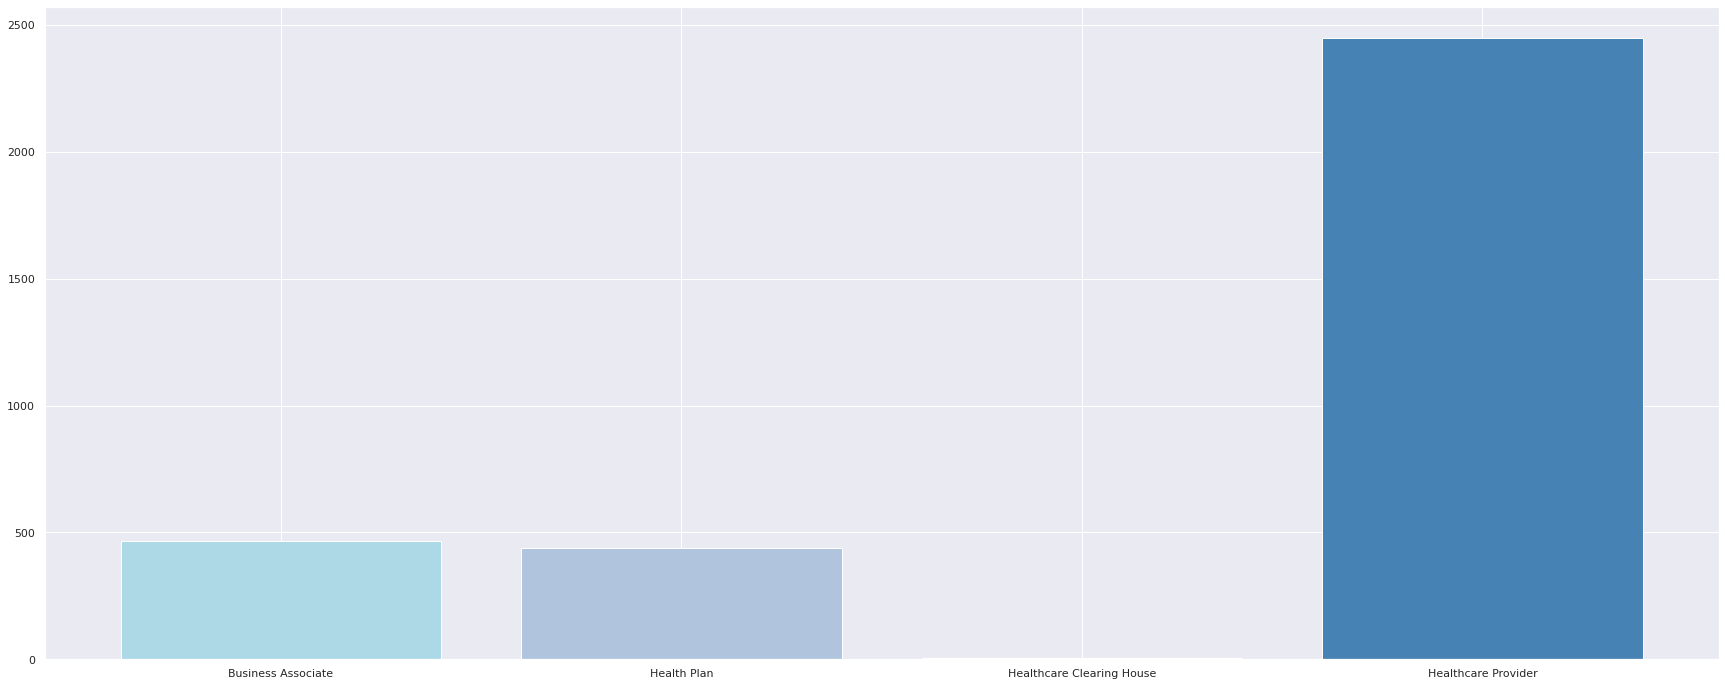

In [ ]:

plt.figure(figsize=(30,12))
plt.bar(results_crop.groupby("Entity Type")["Entity Type"].count().index, 
        results_crop.groupby("Entity Type")["Entity Type"].count(),
         color=my_colors)


Healthcare Providers are the most targeted, either for reasons of the other entities being more centralized and holding less data/clients, or simply having less opportunities for attack vectors. It's more likely that there are more healthcare providers than there are other entities, so picking them off in terms of security vulnerability would prove an optimal strategy. 

In [ ]:
#Let's look into the Data in terms of timing of attacks
import datetime
results_crop['Breach Submission Date']= pd.to_datetime(results_crop['Breach Submission Date'], infer_datetime_format=True)
#results_crop['Breach Submission Date'].copy()

#time[] =  pd.to_datetime(raw_data['Mycol'], infer_datetime_format=True)
#time.to_datetime
results_crop.info()

<Figure size 2160x1440 with 0 Axes>

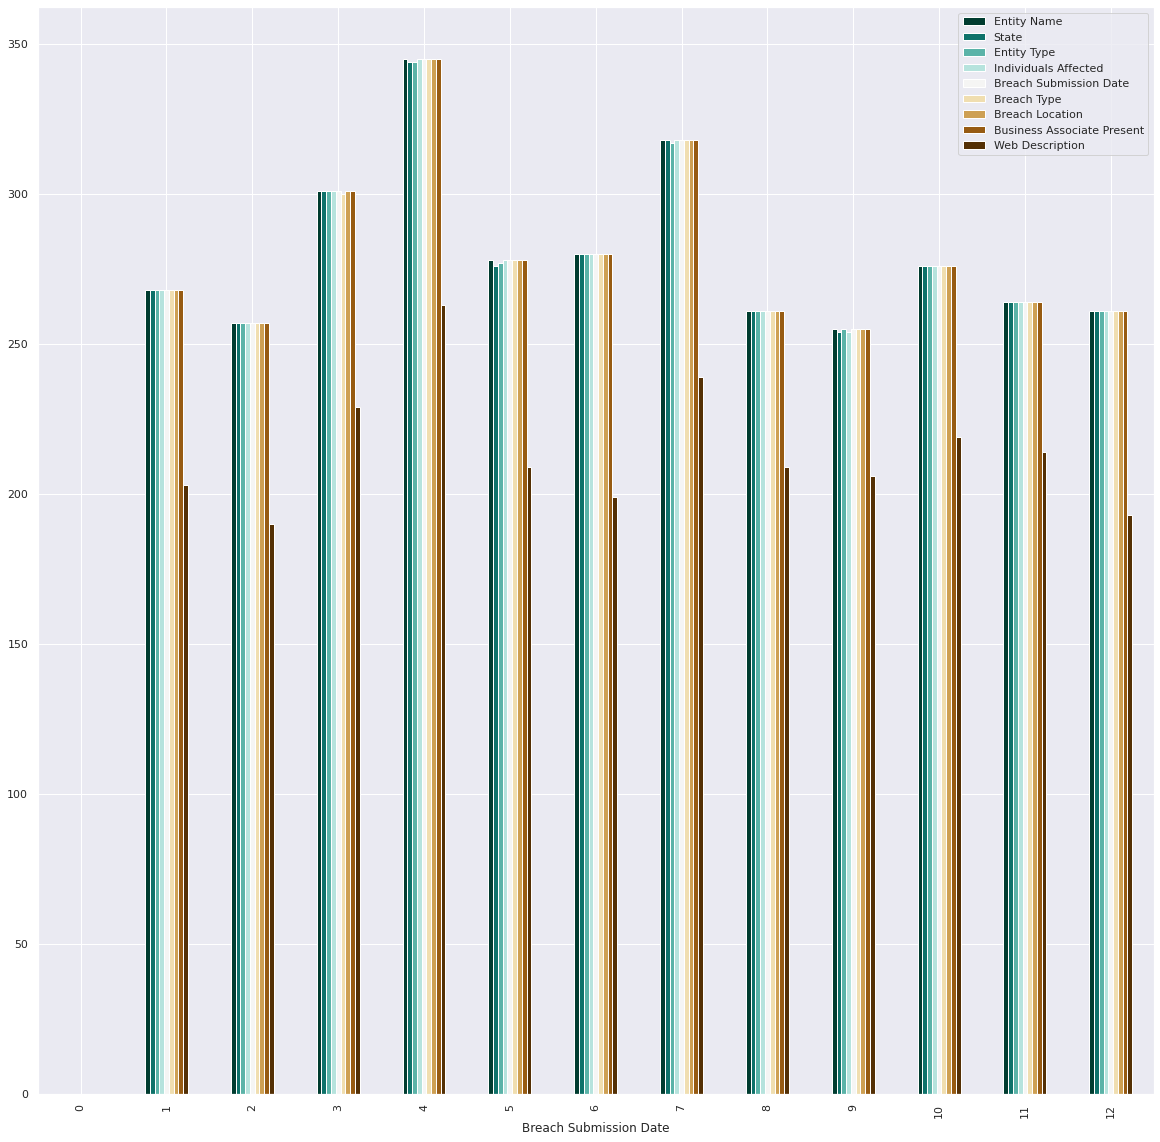

In [ ]:
res = results_crop.groupby(results_crop["Breach Submission Date"].dt.month).count().reindex(np.arange(13), fill_value=0)
res.plot(kind="bar",figsize=(20,20),colormap='BrBG_r')
plt.show()

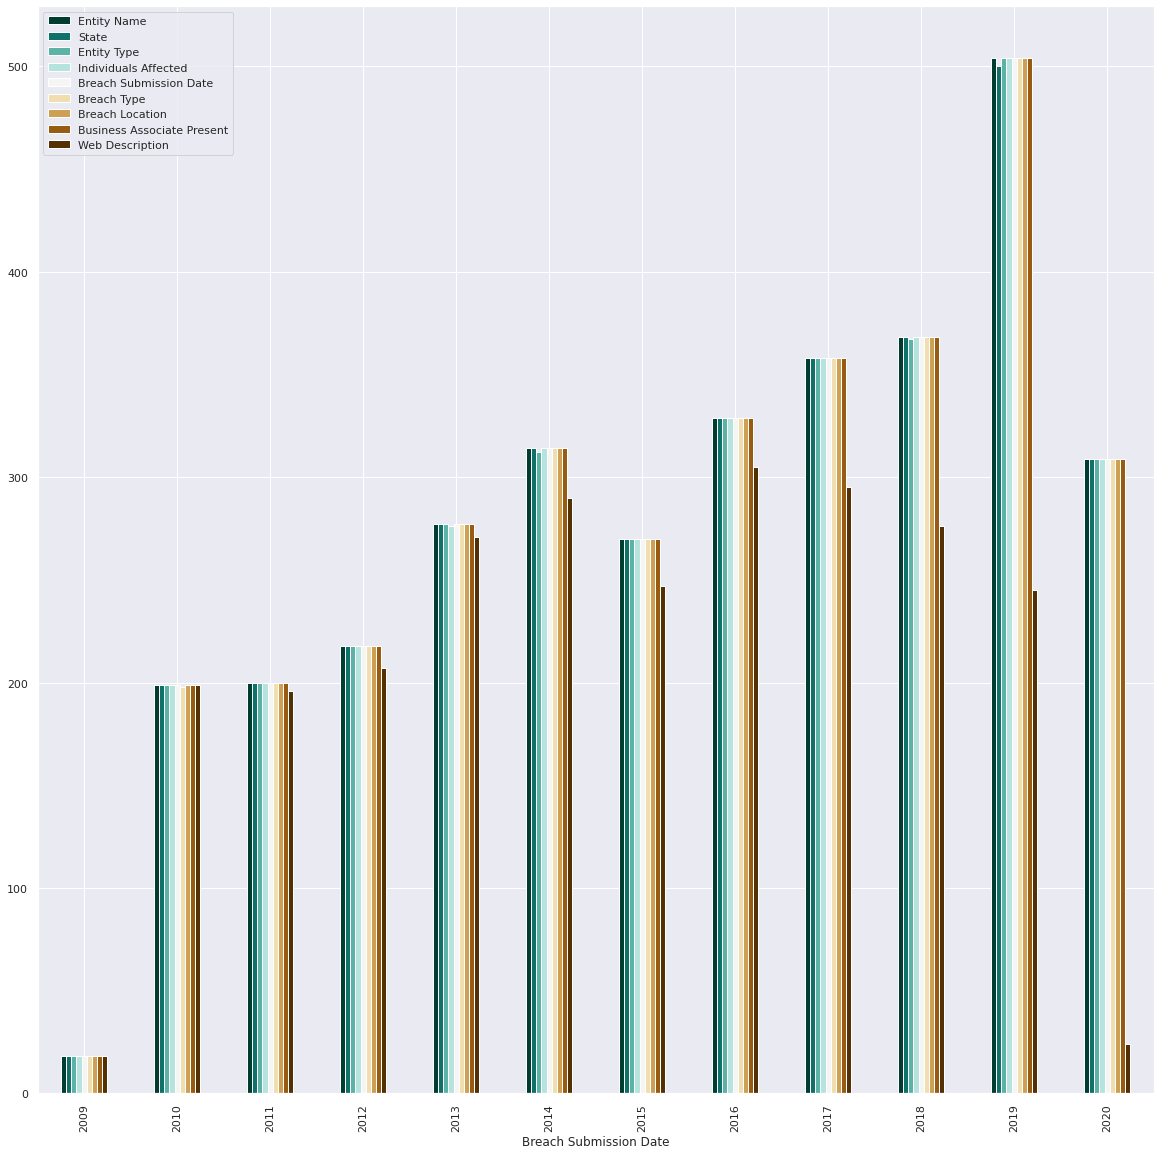

In [ ]:
y = results_crop.groupby(results_crop["Breach Submission Date"].dt.year).count().reindex()
y.plot(kind="bar",figsize=(20,20),colormap='BrBG_r')
plt.show()


Interestingly, the most common time for attacks is during April. Perhaps correlated with tax time or flu season, and medical system congestion?

We can see a steady increase in breach frequency over the years, with it peaking in 2019. This might be due to an increase in online systems, or simply exposure to increased cyberactivity. As systems join networks to send information from prescriber to presciber, faxing is not the means of doing things anymore. Also likely is the growing knowledge of vulnerabilities, and the lagging capacity of healthcare systems primarily focused on healthcare. Incentives for hiring cybersecurity teams are in place for financial institutions, as they are included in licensing policy. Perhaps it is time for more investment in the security and structure of our healthcare systems' cyber integrity. The healthcare breaches are getting even bigger, with headlines like this coming out of Minnesota. Possibly in the wake of the George Floyd timeline of events?
https://www.infosecurity-magazine.com/news/minnesota-suffers-secondlargest/

We see that there is a major jump from 2009 to 2010 in the frequency of data breaches. Worthy of mention, the iPhone was released in 2007, and according to the wikipedia page of "History of the iPhone", 'By the end of 2009, iPhone models had been released in all major markets.'. This may further the hypothesis that increasing numbers of systems with online participation with patient data contributed to greater numbers of information breaches.

#DB Restructuring, Probing

#What else can we explore? These may be added in later treatments to to understand the depth and extent of the data. 

1.   Total Number of Individuals Effected
2.   Individuals Effected per breach

2.   Individuals Affected Per Month
3.   Individuals affected per state





Probe data more, assess by state for example and ideas on how to split data
possibly by region -> group east coast/west coast states, cross reference by population 